<a href="https://colab.research.google.com/github/agrpriyank2807/univ.ai.hack_1/blob/main/Hack_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import sys
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import xgboost as xgb
import pickle
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import time
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import layers
!pip install -q -U keras-tuner
from kerastuner.tuners import RandomSearch
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from keras.utils import np_utils

In [ ]:
train_data=pd.read_csv('/content/drive/MyDrive/Univ.AI_hackathon/Training Data.csv')

In [ ]:
train_data=train_data.drop(columns=['Id'])
le=LabelEncoder()
train_data['married']=(le.fit_transform(train_data['married'].astype('str')))
train_data['house_ownership']=le.fit_transform(train_data['house_ownership'].astype('str'))
train_data['car_ownership']=le.fit_transform(train_data['car_ownership'].astype('str'))
train_data['profession']=le.fit_transform(train_data['profession'].astype('str'))
train_data['city']=le.fit_transform(train_data['city'].astype('str'))
train_data['state']=le.fit_transform(train_data['state'].astype('str'))
train_x=train_data.drop(columns=['risk_flag'])
train_y=train_data['risk_flag']

In [ ]:
test_data=pd.read_csv('/content/drive/MyDrive/Univ.AI_hackathon/Test Data.csv')

In [ ]:
test_data=test_data.drop(columns='id',axis=1)
test_data.head()

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [ ]:
test_data['married']=(le.fit_transform(test_data['married'].astype('str')))
test_data['house_ownership']=le.fit_transform(test_data['house_ownership'].astype('str'))
test_data['car_ownership']=le.fit_transform(test_data['car_ownership'].astype('str'))
test_data['profession']=le.fit_transform(test_data['profession'].astype('str'))
test_data['city']=le.fit_transform(test_data['city'].astype('str'))
test_data['state']=le.fit_transform(test_data['state'].astype('str'))

In [ ]:
X = train_data.drop(columns = ['risk_flag']) #Independent_features
y = train_data['risk_flag'] #Dependent_features
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_y)
X1=train_data['married']
X2=train_data['house_ownership']
X3=train_data['car_ownership']
X4=train_data['profession']
X5=train_data['city']
X6=train_data['state']
encoded_X1 = encoder.fit_transform(X1)
encoded_X2 = encoder.fit_transform(X2)
encoded_X3 = encoder.fit_transform(X3)
encoded_X4 = encoder.fit_transform(X4)
encoded_X5 = encoder.fit_transform(X5)
encoded_X6 = encoder.fit_transform(X6)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_X1 = pd.DataFrame(np_utils.to_categorical(encoded_X1))
dummy_X2 = pd.DataFrame(np_utils.to_categorical(encoded_X2))
dummy_X3 = pd.DataFrame(np_utils.to_categorical(encoded_X3))
dummy_X4 = pd.DataFrame(np_utils.to_categorical(encoded_X4))
dummy_X5 = pd.DataFrame(np_utils.to_categorical(encoded_X5))
dummy_X6 = pd.DataFrame(np_utils.to_categorical(encoded_X6))
X=pd.concat([dummy_X1,dummy_X2,dummy_X3,dummy_X4,dummy_X5,dummy_X6,train_data['income'],train_data['age'],train_data['experience'],train_data['current_job_years'],train_data['current_house_years']],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.15, random_state = 0)

In [ ]:
sc = StandardScaler(with_mean=False)
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Epoch 1/200
365/365 [==============================] - 5s 6ms/step - loss: 0.4430 - accuracy: 0.8765 - val_loss: 0.3423 - val_accuracy: 0.8781
Epoch 2/200
365/365 [==============================] - 2s 6ms/step - loss: 0.3229 - accuracy: 0.8753 - val_loss: 0.2570 - val_accuracy: 0.8877
Epoch 3/200
365/365 [==============================] - 2s 6ms/step - loss: 0.2562 - accuracy: 0.8897 - val_loss: 0.2439 - val_accuracy: 0.8951
Epoch 4/200
365/365 [==============================] - 2s 5ms/step - loss: 0.2369 - accuracy: 0.8955 - val_loss: 0.2385 - val_accuracy: 0.8953
Epoch 5/200
365/365 [==============================] - 2s 6ms/step - loss: 0.2251 - accuracy: 0.8974 - val_loss: 0.2356 - val_accuracy: 0.8977
Epoch 6/200
365/365 [==============================] - 2s 6ms/step - loss: 0.2137 - accuracy: 0.8980 - val_loss: 0.2384 - val_accuracy: 0.8961
Epoch 7/200
365/365 [==============================] - 2s 6ms/step - loss: 0.2064 - accuracy: 0.9000 - val_loss: 0.2385 - val_accuracy: 0.8957

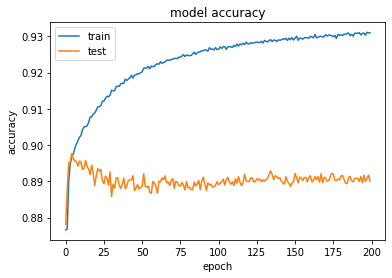

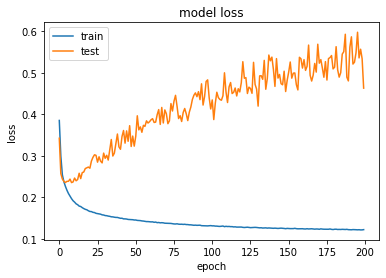

The confusion matrix is: [[30812  2363]
 [ 1848  2777]]
The accuracy score with test data is= 0.8885978835978836


In [ ]:
# Initialising the ANN
classifier_1 = Sequential()

# Adding the input layer and the first hidden layer
classifier_1.add(Dense(units = 512, kernel_initializer = 'uniform',activation='relu',input_dim = 409))
classifier_1.add(Dropout(0.2))
# Adding the second hidden layer
classifier_1.add(Dense(units = 32, kernel_initializer = 'uniform',activation='relu'))
classifier_1.add(Dropout(0.2))
classifier_1.add(Dense(units = 32, kernel_initializer = 'uniform',activation='relu'))
classifier_1.add(Dropout(0.2))
classifier_1.add(Dense(units = 32, kernel_initializer = 'uniform',activation='relu'))
# classifier.add(Dropout(0.2))
classifier_1.add(Dense(units = 32, kernel_initializer = 'uniform',activation='relu'))
# Adding the output layer
classifier_1.add(Dense(units = 2, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN

classifier_1.compile(optimizer = 'Adam', loss='binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
model_history=classifier_1.fit(X_train, y_train,validation_split = 0.15, batch_size =500, epochs = 200)

# list all data in history

print(model_history.history.keys())
#summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier_1.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("The confusion matrix is:",cm) ##plot confusion matrix
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print("The accuracy score with test data is=",score)

# estimator = KerasClassifier(build_fn=classifier, epochs= 30, batch_size=5, verbose=0)
# kfold = KFold(n_splits=10, shuffle=True)
# results = cross_val_score(estimator, X_test, y_test, cv=kfold)
# print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


In [ ]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 20)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(2, activation='sigmoid'))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
            loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
            metrics=['accuracy'])
    return model

In [ ]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='project')

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 4
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 20, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.2, random_state=0)

In [ ]:
tuner.search(X_train, y_train,
             epochs=100,
             validation_data=(X_test, y_test))


Search: Running Trial #1

Hyperparameter    |Value             |Best Value So Far 
num_layers        |10                |?                 
units_0           |288               |?                 
units_1           |96                |?                 
learning_rate     |0.01              |?                 

Epoch 1/100
6300/6300 [==============================] - 27s 4ms/step - loss: 46.8305 - accuracy: 0.8730 - val_loss: 0.3718 - val_accuracy: 0.8782
Epoch 2/100
6300/6300 [==============================] - 25s 4ms/step - loss: 0.3775 - accuracy: 0.8748 - val_loss: 0.3709 - val_accuracy: 0.8782
Epoch 3/100
6300/6300 [==============================] - 25s 4ms/step - loss: 0.3743 - accuracy: 0.8765 - val_loss: 0.3707 - val_accuracy: 0.8782
Epoch 4/100
6300/6300 [==============================] - 26s 4ms/step - loss: 0.3754 - accuracy: 0.8760 - val_loss: 0.3712 - val_accuracy: 0.8782
Epoch 5/100
6300/6300 [==============================] - 25s 4ms/step - loss: 0.3735 - accuracy: 0.876

In [ ]:
tuner.results_summary()

In [ ]:
    model2 = RandomForestClassifier(max_features= None, n_jobs = -1,random_state =50, min_samples_leaf = 1,n_estimators=150,max_depth=None,min_samples_split=4,criterion='gini')
    model2.fit(train_x,train_y)
    print("Training accuracy=",model2.score(train_x,train_y))

Training accuracy= 0.9354960317460318


In [ ]:
predic=pd.DataFrame()
test_data1=test_data.to_numpy()
for i in range(len(test_data1)):
  df=test_data1[i]
  pred_val=model2.predict([df])
  pred_val=pd.DataFrame(pred_val)
  predic=predic.append(pred_val,ignore_index=True)

KeyboardInterrupt: ignored

In [ ]:
predic.to_csv('predictions_all.csv')

# Stacking

In [ ]:
X=train_data.drop(columns='risk_flag')
y=train_data['risk_flag']

In [ ]:
# let's divide our dataset into training set and hold out set by 50%
train,val_train,test,val_test = train_test_split(X,y,test_size=0.5, random_state= 355)

In [ ]:
# let's split the training set again into training and test dataset 
x_train,x_test,y_train,y_test =  train_test_split(train,test,test_size=0.2, random_state= 355)

In [ ]:
rfc=RandomForestClassifier(max_features= None, n_jobs = -1, min_samples_leaf = 1,n_estimators=150,max_depth=None,min_samples_split=4,criterion='gini')
rfc.fit(x_train,y_train)
print(rfc.score(x_train, y_train))
print(rfc.score(x_test,y_test))

0.9396428571428571
0.8984920634920635


In [ ]:
roc_auc_score(y_test, rfc.predict(x_test))

0.7313811972980525

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(x_train)
X_test_scaled = sc.transform(x_test)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=11,weights = 'distance')
knn.fit(x_train,y_train)
print(knn.score(x_test,y_test))
knn.score(x_train,y_train)

0.891468253968254


0.9379861111111111

In [ ]:
roc_auc_score(y_test, knn.predict(x_test))

0.7363501593208468

TypeError: ignored

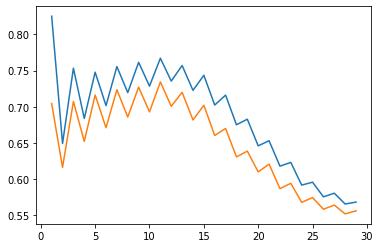

In [ ]:
neighbors = list(range(1,30))
train_results = []
test_results = []
for n in neighbors:
   model = KNeighborsClassifier(n_neighbors=n)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1 = plt.plot(neighbors, train_results, label="Train AUC")
line2 = plt.plot(neighbors, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_neighbors")
plt.show()

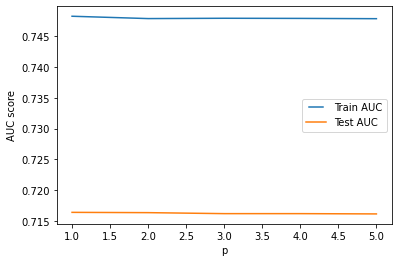

In [ ]:
distances = [1, 2, 3, 4, 5]
train_results = []
test_results = []
for p in distances:
   model = KNeighborsClassifier(p=p)
   model.fit(x_train, y_train)
   train_pred = model.predict(x_train)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   train_results.append(roc_auc)
   y_pred = model.predict(x_test)
   false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
   roc_auc = auc(false_positive_rate, true_positive_rate)
   test_results.append(roc_auc)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(distances, train_results, label="Train AUC")
line2, = plt.plot(distances, test_results, label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("p")
plt.show()


In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_scaled,y_train)
print(gnb.score(X_train_scaled,y_train))
gnb.score(X_test_scaled,y_test)

0.8771031746031746


0.876547619047619

In [ ]:
roc_auc_score(y_test, gnb.predict_proba(x_test)[:, 1])

0.5

In [ ]:
gbt= GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.05)
gbt.fit(x_train,y_train)
print(gbt.score(x_train,y_train))
gbt.score(x_test,y_test)

0.8774206349206349


0.8766269841269841

In [ ]:
roc_auc_score(y_test, gbt.predict_proba(x_test)[:, 1])

0.6694610152182487

In [ ]:
abc = AdaBoostClassifier(n_estimators=100, random_state=0)
abc.fit(x_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=0)

In [ ]:
print(abc.score(x_train,y_train))
print(abc.score(x_test,y_test))

0.8773214285714286
0.8766666666666667


In [ ]:
roc_auc_score(y_test,abc.predict_proba(x_test)[:, 1])

0.5950256406249002

In [ ]:
xgb = XGBClassifier(learning_rate=0.001, n_estimators=200)
xgb.fit(x_train, y_train)
print(xgb.score(x_train,y_train))
xgb.score(x_test,y_test)

0.8772619047619048


0.876547619047619

In [ ]:
roc_auc_score(y_test,xgb.predict(x_test))

0.5001380843246875

In [ ]:
def modelfit(alg, dtrain, predictors, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions))
    print("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob))
                    
    feat_imp = pd.Series(alg.booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')

In [ ]:
xgb1 = XGBClassifier(
 learning_rate =0.1,
 n_estimators=3000,
 max_depth=9,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)
xgb1.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=None, n_estimators=3000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [ ]:
print(xgb1.score(x_train,y_train))
print(xgb1.score(x_test,y_test))

0.9396626984126984
0.8978174603174603


In [ ]:
roc_auc_score(y_test,xgb1.predict(x_test))

0.7311344747052697

In [ ]:
# LinearSVC_classifier.fit(x_train,y_train)


In [ ]:
# print("Training accuracy=",LinearSVC_classifier.score(x_train,y_train))
# print("Testing accurcay=",LinearSVC_classifier.score(x_test,y_test))

In [ ]:
# y_test=(y_test).to_numpy()

In [ ]:
# roc_auc_score(y_test,LinearSVC_classifier.predict_proba(x_test)[:, 1])


In [ ]:
#best
predict_val1 = rfc.predict(val_train)
predict_val2 = knn.predict(val_train)
predict_val3 = xgb1.predict(val_train)

In [ ]:
predict_val = np.column_stack((predict_val1,predict_val2,predict_val3))
predict_val

array([[0, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       ...,
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
predict_test1 = rfc.predict(x_test)
predict_test2 = knn.predict(x_test)
predict_test3 = xgb1.predict(x_test)

In [ ]:
predict_test = np.column_stack((predict_test1,predict_test2,predict_test3))

In [ ]:
rand_clf = RandomForestClassifier()

rand_clf.fit(predict_val,val_test)
rand_clf.score(predict_test,y_test)

0.898452380952381

In [ ]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
# grid_param = {
#     "n_estimators" : [90,100,115,130,150,200],
#     'criterion': ['gini', 'entropy'],
#     'min_samples_leaf' : [1,2,3,4,5,6,7],
#     'min_samples_split': [1,2,3,4,5,6,7,8],
#     'max_features' : ['auto','log2']
# }
# grid_search = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=5,n_jobs =-1,verbose = 3)

In [ ]:
#grid_search.fit(predict_val,val_test)

In [ ]:
# print(grid_search.best_score_)
# grid_search.best_params_

In [ ]:
predict_val=pd.DataFrame(data=predict_val)
predict_val.to_csv('jhsj.csv')

In [ ]:
predic_rfc=pd.DataFrame()
for i in range(len(test_data)):
  df=test_data.iloc[[i]]
  df=df.to_numpy()
  pred_val=rfc.predict(df)
  pred_val=pd.DataFrame(pred_val)
  predic_rfc=predic_rfc.append(pred_val,ignore_index=True)

In [ ]:
predic_knn=pd.DataFrame()
for i in range(len(test_data)):
  df=test_data.iloc[[i]]
  df=df.to_numpy()
  pred_val=knn.predict(df)
  pred_val=pd.DataFrame(pred_val)
  predic_knn=predic_knn.append(pred_val,ignore_index=True)

In [ ]:
predic_xgb=pd.DataFrame()
for i in range(len(test_data)):
  df=test_data.iloc[[i]]
  pred_val=xgb1.predict(df)
  pred_val=pd.DataFrame(pred_val)
  predic_xgb=predic_xgb.append(pred_val,ignore_index=True)

In [ ]:
predic_xgb

,0
0,0
1,0
2,0
3,0
4,0
...,...
27995,0
27996,0
27997,0
27998,0


In [ ]:
predic_rfc.to_csv('predctions(rfc_new).csv')

In [ ]:
predict_val_meta = np.column_stack((predic_rfc,predic_knn,predic_xgb))

In [ ]:
predictions=rand_clf.predict(predict_val_meta)

In [ ]:
predictions=pd.DataFrame(data=predictions)

In [ ]:
predictions.to_csv('predictions(stacking_new).csv')